<a href="https://colab.research.google.com/github/GitTyan/DeepLearning/blob/master/10_%E5%9F%BA%E6%9C%AC/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# python3.6　バージョン確認
import sys
print(sys.version)
# TF2.xの読み込み
import tensorflow as tf
# バージョンの確認
print('TensorFlow version: {}'.format(tf.__version__))

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version: 2.4.1


=====テストデータ=====
(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
=====1.モデルの構築=====
=====2.モデルのコンパイル=====
=====3.モデルの学習=====
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 4.3932 - accuracy: 0.8161
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3467 - accuracy: 0.9264
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2067 - accuracy: 0.9464
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9576
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9600
=====4.モデルの評価=====
313/313 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9522
=====5.モデルの保存(シリアル化)=====
INFO:tensorflow:Assets written to: Sequential_model/assets
=====モデルの読み込み====
=====グラフの可視化=====


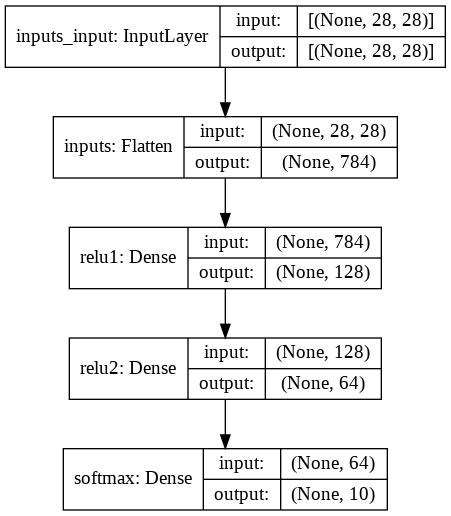

In [11]:
# ==============================
# Sequential API (初心者向き)
# ==============================
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("=====テストデータ=====")
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)

print("=====1.モデルの構築=====")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='inputs'),
  tf.keras.layers.Dense(128, activation='relu', name='relu1'),
  tf.keras.layers.Dense(64, activation='relu', name='relu2'),
  tf.keras.layers.Dense(10, activation='softmax', name='softmax')
], name='Sequential')
print("=====2.モデルのコンパイル=====")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("=====3.モデルの学習=====")
history = model.fit(x_train, y_train, epochs=5, batch_size=32)
print("=====4.モデルの評価=====")
model.evaluate(x_test,  y_test, verbose=1)
print("=====5.モデルの保存(シリアル化)=====")
model.save('Sequential_model')
print("=====モデルの読み込み====")
model_load = tf.keras.models.load_model('Sequential_model')
print("=====グラフの可視化=====")
tf.keras.utils.plot_model(model, to_file='Sequetial.png', show_shapes=True)

=====テストデータ=====
(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
=====1.モデルの構築=====
=====2.モデルのコンパイル=====
=====3.モデルの学習=====
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6718 - accuracy: 0.8145
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4246 - accuracy: 0.9005
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - accuracy: 0.9142
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.9182
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.9291
=====4.モデルの評価=====
313/313 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.9237
=====5.モデルの保存(シリアル化)=====
INFO:tensorflow:Assets written to: Functional_model/assets
=====グラフの可視化=====


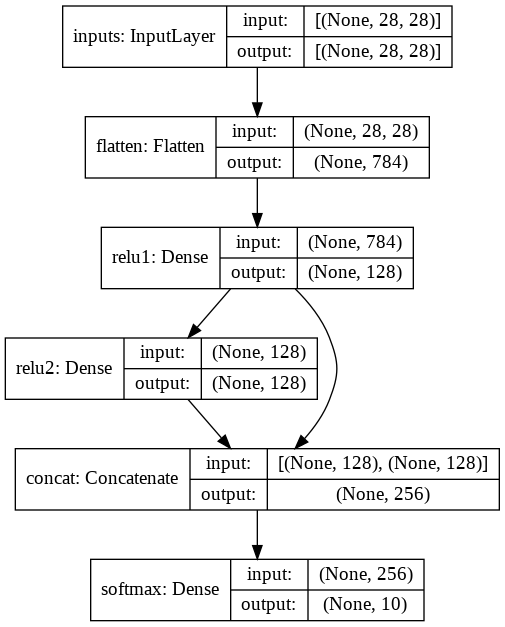

In [12]:
# ==============================
# Functional API (中初級者向き)
# ==============================
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("=====テストデータ=====")
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)
print("=====1.モデルの構築=====")
inputs   = tf.keras.layers.Input(shape=(28, 28), name='inputs')
flatten  = tf.keras.layers.Flatten(name='flatten')(inputs)
hidden1   = tf.keras.layers.Dense(128, activation='relu', name='relu1')(flatten)
hidden2   = tf.keras.layers.Dense(128, activation='relu', name='relu2')(hidden1)
concat   = tf.keras.layers.Concatenate(name='concat')([hidden1, hidden2])
outputs  = tf.keras.layers.Dense(10, activation='softmax', name='softmax')(concat)
model    = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='functional')
print("=====2.モデルのコンパイル=====")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("=====3.モデルの学習=====")
history = model.fit(x_train, y_train, epochs=5, batch_size=32)
print("=====4.モデルの評価=====")
model.evaluate(x_test,  y_test, verbose=1)
print("=====5.モデルの保存(シリアル化)=====")
model.save('Functional_model')
print("=====グラフの可視化=====")
tf.keras.utils.plot_model(model, to_file='Functional.png', show_shapes=True)

Model: "model_constructor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_in (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 6)                 18        
_________________________________________________________________
activation1 (Activation)     (None, 6)                 0         
_________________________________________________________________
layer2 (Dense)               (None, 3)                 21        
_________________________________________________________________
activation2 (Activation)     (None, 3)                 0         
_________________________________________________________________
layer_out (Dense)            (None, 1)                 4         
_________________________________________________________________
acti_out (Activation)        (None, 1)           

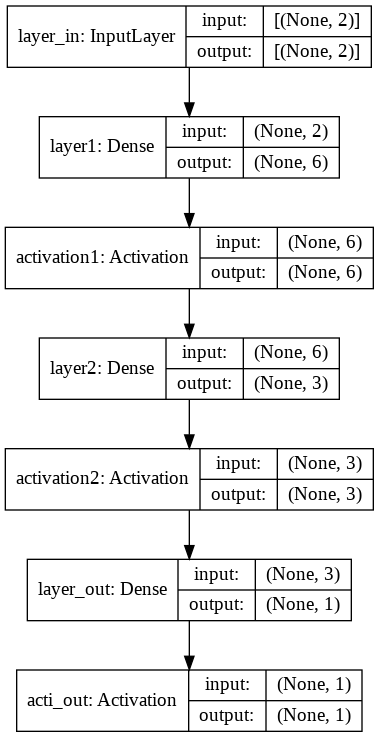

In [21]:
# ==============================
# Functional API (中初級者向き)
# ※別の記述方法
# ==============================
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
from tensorflow.keras import layers       # 「レイヤーズ」モジュールのインポート

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
LAYER1_NEURONS = 6  # ニューロンの数： 6
LAYER2_NEURONS = 3  # ニューロンの数： 3
OUTPUT_RESULTS = 1  # 出力結果の数： 1

# ### 活性化関数を変数（ハイパーパラメーター）として定義 ###
# 変数（モデル定義時に必要となる数値）
activation1 = layers.Activation('tanh' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation1'               # 活性化関数にも名前付け
    )
activation2 = layers.Activation('tanh' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation2'               # 活性化関数にも名前付け
    )
acti_out = layers.Activation('tanh'    # 活性化関数（出力層用）： tanh関数（固定）
    , name='acti_out'                  # 活性化関数にも名前付け
    )

# ### レイヤーを定義 ###
# input_shape引数の代わりに、Inputクラスを使うことも可能
inputs = layers.Input(          # 入力層
    name='layer_in',                 # 表示用に名前付け
    shape=(INPUT_FEATURES,))         # 入力の形状

# 隠れ層：1つ目のレイヤー
layer1 = layers.Dense(          # 全結合層
    #input_shape=(INPUT_FEATURES,),  # ※入力層は定義済みなので不要
    name='layer1',                   # 表示用に名前付け
    units=LAYER1_NEURONS)            # ユニットの数

# 隠れ層：2つ目のレイヤー
layer2 = layers.Dense(          # 全結合層
    name='layer2',                   # 表示用に名前付け
    units=LAYER2_NEURONS)            # ユニットの数

# 出力層
layer_out = layers.Dense(       # 全結合層
    name='layer_out',                # 表示用に名前付け
    units=OUTPUT_RESULTS)            # ユニットの数

# ### フォワードパスを定義 ###
# 「出力＝活性化関数（第n層（入力））」の形式で記述
x1 = activation1(layer1(inputs))     # 活性化関数は変数として定義
x2 = activation2(layer2(x1))         # 同上
outputs = acti_out(layer_out(x2))    # ※活性化関数は「tanh」固定

# ### モデルの生成 ###
model = tf.keras.Model(inputs=inputs, outputs=outputs
    , name='model_constructor'       # モデルにも名前付け
)

# ### 以上でモデル設計は完了 ###
model.summary()                      # モデルの内容を出力
tf.keras.utils.plot_model(model, to_file='model_constructor.png', show_shapes=True)

==========データ==========
X_train:
[[ 1.77475404 -1.27402408]]
y_train:
[[0.]]
X_valid:
[[-1.61714719 -0.39239627]]
y_valid:
[[0.]]
X_test:
[[-4.68385435  0.08885364]]
y_test:
[[0.]]
==========モデル構築==========
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_features (InputLayer)  [(None, 2)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 32)                96        
_________________________________________________________________
activation1 (Activation)     (None, 32)                0         
_________________________________________________________________
layer2 (Dense)               (None, 32)                1056      
_________________________________________________________________
activation2 (Activation)     (None, 32)                0         
_________________________________________________

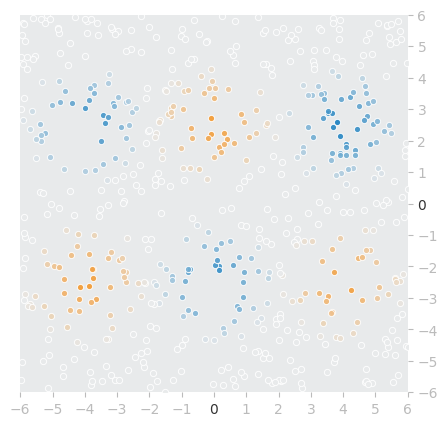

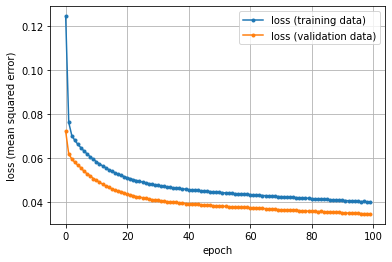

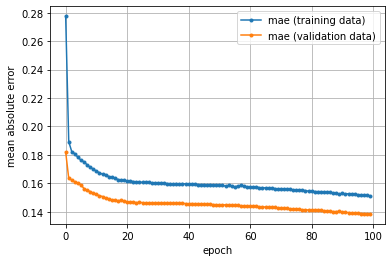

==========未知データでの評価==========
80/80 [==============================] - 0s 1ms/step - loss: 0.0422 - mae: 0.1526
test mae: 0.152633935213089
==========モデルの推論（予測）==========
==========モデルのグラフ==========


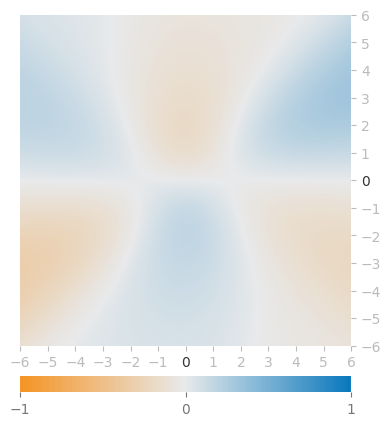

In [56]:
# ==============================
# DNN（回帰問題）
# 座標
# https://www.atmarkit.co.jp/ait/articles/2005/25/news011.html
# ==============================
# 座標点データセットを生成するライブラリのインストール
#!pip install playground-data
# playground-dataライブラリのplygdataパッケージを「pg」という別名でインポート
import plygdata as pg
import tensorflow as tf  # ライブラリ「TensorFlow」のtensorflowパッケージをインポート
import matplotlib.pyplot as plt
from tensorflow.keras import layers    # レイヤー関連モジュールのインポート
from IPython.display import Image

print("==========データ==========")
# 設定値を定数として定義
# 問題種別：「回帰（Regress）」、データ種別：「マルチガウシアン（Gaussian）」を選択
PROBLEM_DATA_TYPE = pg.DatasetType.RegressGaussian
# データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用)
TRAINING_DATA_RATIO = 0.5
TEST_DATA_RATIO = 1.0
# ノイズ
DATA_NOISE = 0.0

# 定義済みの定数を引数に指定して、データを生成する
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)
test_data = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)

# データを「訓練用」と「精度検証用」を指定の比率で分割し、
# さらにそれぞれを「データ（X）」と「教師ラベル（y）」に分ける
X_train, y_train, X_valid, y_valid = pg.split_data(data_list, training_size=TRAINING_DATA_RATIO)
X_test, y_test, _, _ = pg.split_data(test_data, training_size=TEST_DATA_RATIO)
# 訓練データ
print('X_train:'); print(X_train[:1])
print('y_train:'); print(y_train[:1])
# 精度検証データ
print('X_valid:'); print(X_valid[:1])
print('y_valid:'); print(y_valid[:1])
# テストデータ
print('X_test:'); print(X_test[:1])
print('y_test:'); print(y_test[:1])
# 訓練データのプロット
pg.plot_points_with_playground_style(X_train, y_train)

print("==========モデル構築==========")
# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2    # 入力（特徴）の数： 2（＝X座標とY座標）
LAYER1_NEURONS = 32    # ニューロンの数
LAYER2_NEURONS = 32    # ニューロンの数
LAYER3_NEURONS = 32    # ニューロンの数
OUTPUT_RESULTS = 1    # 出力結果の数： 1（＝結果は基本的に「-1.0」～「1.0」の数値）

# 変数（モデル定義時に必要となるもの）
activation1 = layers.Activation('tanh' # 活性化関数（隠れ層用））
    , name='activation1'               # 名前付け
    )
activation2 = layers.Activation('tanh' # 活性化関数（隠れ層用）
    , name='activation2'               
    )
activation3 = layers.Activation('tanh' # 活性化関数（隠れ層用）
    , name='activation3'               
    )
acti_out = layers.Activation('linear'  # 活性化関数（出力層用）： 恒等関数（固定）
    , name='acti_out'                  
    )

# tf.keras.Modelによるモデルの定義
class NeuralNetwork(tf.keras.Model):
    # ### レイヤーを定義 ###
  def __init__(self):
    super(NeuralNetwork, self).__init__()

    # 入力層は定義「不要」。実際の入力によって決まるので

    # 隠れ層：1つ目のレイヤー（layer）
    self.layer1 = layers.Dense(    # 全結合層（線形変換）
      #input_shape=(INPUT_FEATURES,),  # 入力層（定義不要）
      LAYER1_NEURONS,              # 次のレイヤーへの出力ユニット数
      name='layer1')

    # 隠れ層：2つ目のレイヤー（layer）
    self.layer2 = layers.Dense(    # 全結合層
      LAYER2_NEURONS,              # 次のレイヤーへの出力ユニット数
      name='layer2')

    # 隠れ層：3つ目のレイヤー（layer）
    self.layer3 = layers.Dense(    # 全結合層
      LAYER3_NEURONS,              # 次のレイヤーへの出力ユニット数
      name='layer3')
    
    # 出力層
    self.layer_out = layers.Dense( # 全結合層
      OUTPUT_RESULTS,              # 出力結果への出力ユニット数
      name='layer_out')

 # ### フォワードパスを定義 ###
  def call(self, inputs, training=None):   # 入力と、訓練／評価モード
    # 「出力＝活性化関数（第n層（入力））」の形式で記述
    x1 = activation1(self.layer1(inputs))  # 活性化関数は変数として定義
    x2 = activation2(self.layer2(x1))      # 同上
    x3 = activation3(self.layer3(x2))      # 同上
    outputs = acti_out(self.layer_out(x3)) # そのまま出力（＝「恒等関数」）
    return outputs

  # モデル内容の出力を行う独自メソッド
  def get_functional_model(self):
    x = layers.Input(shape=(INPUT_FEATURES,), name='input_features')
    static_model = tf.keras.Model(inputs=[x], outputs=self.call(x)) 
    return static_model

# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()
f_model = model.get_functional_model()
f_model.summary() # モデルの内容を出力
# モデル概要の図を描画する
tf.keras.utils.plot_model(f_model, to_file='f_model.png', show_shapes=True)

print("==========学習==========")
# 定数（学習方法設計時に必要となるもの）
LOSS = 'mse'      # 損失関数：平均二乗誤差（'mean_squared_error'でもOK）
METRICS = ['mae'] # 評価関数：平均絶対誤差（'mean_absolute_error'でもOK）
OPTIMIZER = tf.keras.optimizers.SGD  # 最適化：確率的勾配降下法
LEARNING_RATE = 0.001  # 学習率

# 学習方法を定義する
model.compile(optimizer=OPTIMIZER(learning_rate=LEARNING_RATE),
              loss=LOSS,
              metrics=METRICS)       # 精度（分類では正解率（accuracy）。回帰では損失）

# 定数（ミニバッチ学習時に必要となるもの）
BATCH_SIZE = 15   # バッチサイズ： 15（選択肢は「1」～「30」）
EPOCHS = 100     # エポック数

# 早期終了（する場合は、コメントアウトを解除）
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 学習する
print("loss：損失値＝平均二乗誤差")
print("mse：評価関数値＝平均絶対誤差")
print("loss&mse：訓練データに対する結果")
print("val_loss&val_mse：精度検証データに対する結果")
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_data=(X_valid, y_valid), # 精度検証用
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1,                          # 実行状況表示
                 callbacks=[                         # コールバック
                   #es  # 早期終了（する場合はコメントアウトを解除）
                 ])

print("==========結果==========")
# 学習結果（損失＝平均二乗誤差）のグラフを描画
plt.figure()
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
epochs = len(train_loss)
plt.plot(range(epochs), train_loss, marker='.', label='loss (training data)')
plt.plot(range(epochs), valid_loss, marker='.', label='loss (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss (mean squared error)')

# 評価関数（平均絶対誤差）のグラフを描画
plt.figure()
train_mae = hist.history['mae']
valid_mae = hist.history['val_mae']
epochs = len(train_mae)
plt.plot(range(epochs), train_mae, marker='.', label='mae (training data)')
plt.plot(range(epochs), valid_mae, marker='.', label='mae (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mean absolute error')
plt.show()

print("==========未知データでの評価==========")
# 未知のテストデータで学習済みモデルの汎化性能を評価
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('test mae:', score[1])

# 推論（予測）する
print("==========モデルの推論（予測）==========")
model.predict([[0.0, -3.0]])

print("==========モデルのグラフ==========")
# ヒートマップ／決定境界のグラフを描画する
fig = pg.get_playground_figure()
ax = pg.get_playground_axes(fig)
pg.draw_decision_boundary(fig, ax, trained_model=model)

==========結果==========
==========データ例==========


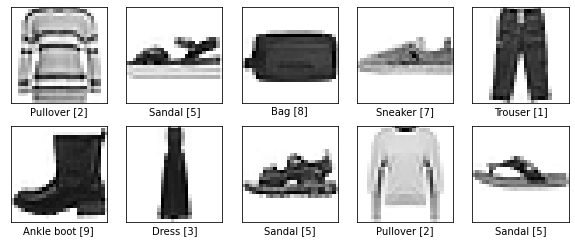

==========データ例（詳細）==========
y_train（正解ラベル）: 「 2 」
X_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,3,1,5,0,0,32,138,146,140,121,147,144,149,130,137,145,156,107,13,0,0,2,2,0,0,0
1,0,0,0,2,0,67,210,202,171,134,85,61,122,146,148,86,73,93,113,142,177,160,17,0,0,0,0,0
2,0,0,0,0,70,226,74,20,25,34,50,52,19,5,4,26,54,35,18,20,12,70,182,24,0,0,0,0
3,0,0,0,1,194,48,48,85,74,77,72,59,73,72,76,69,62,56,66,56,66,12,53,142,0,0,0,0
4,0,0,0,67,145,35,100,94,80,76,75,67,64,61,60,67,67,61,65,65,66,68,24,120,13,0,0,0
5,0,0,0,74,108,49,118,96,77,66,62,57,56,57,58,54,50,56,50,61,76,77,45,85,45,0,0,0
6,0,0,0,67,105,54,133,91,48,44,48,43,41,43,38,52,49,40,25,46,69,77,56,74,51,0,0,0
7,0,0,0,53,85,57,158,144,101,185,193,198,180,158,185,204,193,184,146,59,58,94,58,48,36,0,0,0
8,0,0,0,109,113,32,129,214,200,140,93,82,81,86,104,91,78,82,145,190,75,66,38,136,154,0,0,0
9,0,0,0,124,246,129,168,216,82,28,9,4,5,6,17,19,9,11,14,125,203,102,194,200,115,0,0,0


==========モデル構築==========
==========学習==========
Epoch 1/100
500/500 [==============================] - 3s 4ms/step - loss: 0.8348 - accuracy: 0.7126 - val_loss: 0.4200 - val_accuracy: 0.8528
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 0.4308 - accuracy: 0.8450 - val_loss: 0.4116 - val_accuracy: 0.8518
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3879 - accuracy: 0.8604 - val_loss: 0.3675 - val_accuracy: 0.8646
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3608 - accuracy: 0.8661 - val_loss: 0.3556 - val_accuracy: 0.8706
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3448 - accuracy: 0.8722 - val_loss: 0.3362 - val_accuracy: 0.8767
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3262 - accuracy: 0.8792 - val_loss: 0.3352 - val_accuracy: 0.8767
Epoch 7/100
500/500 [==============================] - 2s 4ms/step - loss: 0.3176 - accuracy:

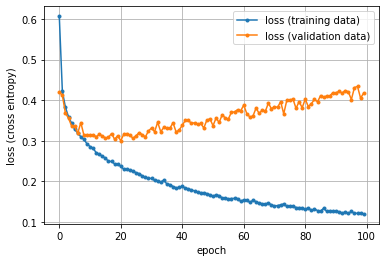

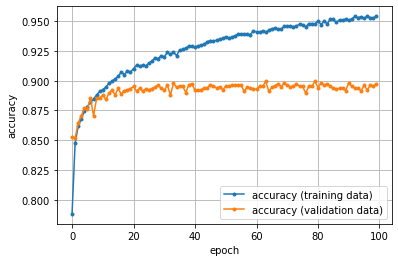

==========未知データの評価1==========
105/105 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8927
test socre([loss, accuracy]): [0.4522061049938202, 0.8927000164985657]
==========未知データの評価2==========


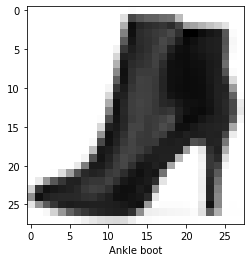

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[9]


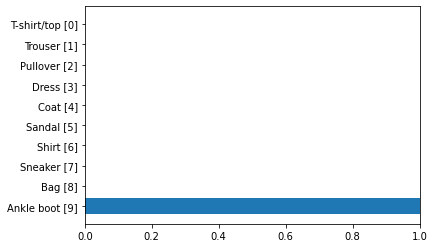

In [69]:
# ==============================
# DNN（回帰問題）
# 画像分類
# https://www.atmarkit.co.jp/ait/articles/2006/08/news031_2.html
# ==============================
# TensorFlowライブラリのtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）
import numpy as np               # 数値計算ライブラリ（データのシャッフルに使用）
import pandas as pd # データ解析支援「pandas」
import tensorflow as tf  # ライブラリ「TensorFlow」のtensorflowパッケージをインポート
import matplotlib.pyplot as plt
from tensorflow.keras import layers    # レイヤー関連モジュールのインポート

print("==========結果==========")
# Fashion-MNISTデータ（※NumPyの多次元配列型）を取得する
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# データ分割は自動で、訓練用が6万枚、テスト用が1万枚（ホールドアウト法）。
# さらにそれぞれを「入力データ（X：行列）」と「ラベル（y：ベクトル）」に分ける


# ※訓練データは、学習時のfit関数で訓練用と精度検証用に分割する。
# そのため、あらかじめ訓練データをシャッフルしておく
p = np.random.permutation(len(X_train))    # ランダムなインデックス順の取得
X_train, y_train = X_train[p], y_train[p]  # その順で全行を抽出する（＝シャッフル）

print("==========データ例==========")
# ［内容確認］データのうち、最初の10枚だけを表示
classes_name = ['T-shirt/top [0]', 'Trouser [1]', 'Pullover [2]', 
                'Dress [3]', 'Coat [4]', 'Sandal [5]', 'Shirt [6]',
                'Sneaker [7]', 'Bag [8]', 'Ankle boot [9]']
plt.figure(figsize=(10,4))  # 横：10インチ、縦：4インチの図
for i in range(10):
  plt.subplot(2,5,i+1)  # 図内にある（sub）2行5列の描画領域（plot）の何番目かを指定
  plt.xticks([])        # X軸の目盛りを表示しない
  plt.yticks([])        # y軸の目盛りを表示しない
  plt.grid(False)       # グリッド線を表示しない
  plt.imshow(           # 画像を表示する
    X_train[i],         # 1つの訓練用入力データ（28行×28列）
    cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
  plt.xlabel(classes_name[y_train[i]])  # X軸のラベルに分類名を表示
plt.show()

print("==========データ例（詳細）==========")
# 1件の訓練データの、ラベルと入力データを表示する
print('y_train（正解ラベル）: 「',y_train[0],'」');
print('X_train:');
display(pd.DataFrame(X_train[0])) # NumPy多次元配列をPandasデータフレームに変換して表示

# 正規化　0～255　⇒　0～1.0
X_train = (X_train / 255.0).astype(np.float32)
X_test = (X_test / 255.0).astype(np.float32)

print("==========モデル構築==========")
# 定数（モデル定義時に必要となるもの）
INPUT_ROWS = 28         # 入力行の数： 28行
INPUT_COLS = 28         # 入力列の数： 28列
                        # 入力（特徴）の数： 784（＝28行×28列）
LAYER1_NEURONS = 128    # ニューロンの数
LAYER2_NEURONS = 64     # ニューロンの数
OUTPUT_RESULTS = 10     # 出力結果の数： 10（＝「0」～「9」の10クラスに分類）
#OUTPUT_RESULTS = 1     # 後述する二値分類の場合： 1（＝「0.0」～「1.0」の2値に分類）

# 過学習対策でドロップアウトを使う場合はコメントオフ：
DROPOUT1_RATE = 0.2     # 第1隠れ層から第2隠れ層へのドロップ率： 0.2（20％）

# 変数（活性化関数）
activation1 = layers.ReLU(name='activation1')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
activation2 = layers.ReLU(name='activation2')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
act_output = layers.Softmax(name='act_output') # 活性化関数（出力層用）： Softmax関数（固定）
# tf.keras.Modelによるモデルの定義

class NeuralNetwork(tf.keras.Model):

  # レイヤー（層）を定義
  def __init__(self):
    super().__init__()

    # 入力層：入力データのフラット化（Flatten）
    self.flatten_input = layers.Flatten(    # 行列データのフラット化
      input_shape=(INPUT_ROWS, INPUT_COLS), # 入力の形状（＝入力層）※タプル形式
      name='flatten_input')
 
    # 隠れ層：1つ目のレイヤー（layer）
    self.layer1 = layers.Dense(       # 全結合層（線形変換）
      # 入力ユニット数は、前の出力ユニット数が使われるので、指定不要
      LAYER1_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer1')

    # 第1レイヤーの後でドロップアウトを使う場合はコメントオフ：
    self.dropput1 = layers.Dropout(  # ドロップアウト
      DROPOUT1_RATE,                 # 何％ドロップするか
      name='dropput1')
    
    # 隠れ層：2つ目のレイヤー（layer）
    self.layer2 = layers.Dense(       # 全結合層
      LAYER2_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer2')

    # 出力層
    self.layer_out = layers.Dense(    # 全結合層
      OUTPUT_RESULTS,                 # 出力結果への出力ユニット数
      name='layer_out')

  # フォワードパスを定義
  def call(self, x, train_mode=True):
    x = self.flatten_input(x)         # 入力データのフラット化

    # 「出力＝活性化関数（第n層（入力））」の形式で記述
    x = activation1(self.layer1(x))   # 活性化関数は変数として定義

    #ドロップアウトを使う場合はコメントオフ：
    if train_mode:                   # 訓練時のみ……
      x = self.dropput1(x)           # ……ドロップアウト（不活性化）

    x = activation2(self.layer2(x))   # 活性化関数は変数として定義

    x = act_output(self.layer_out(x)) # ※活性化関数は「softmax」固定
    return x

  # モデル内容の出力を行う独自メソッド
  def get_static_model(self):
    x = layers.Input(shape=(28,28), name='input_features')
    static_model = tf.keras.Model(inputs=[x], outputs=self.call(x)) 
    return static_model

# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()

# モデル概要の図を描画する
f_model = model.get_static_model()
filename = 'model.png';
tf.keras.utils.plot_model(f_model, show_shapes=True, show_layer_names=True, to_file=filename)
from IPython.display import Image
Image(retina=False, filename=filename) # 図で描画
#f_model.summary()                     # テキストで出力
Image(retina=False, filename=filename)

print("==========学習==========")
# 定数（学習方法設計時に必要となる数値）
LOSS = 'sparse_categorical_crossentropy'  # 損失関数：多クラス分類用の交差エントロピー
METRICS = ['accuracy']                    # 評価関数：正解率
OPTIMIZER = tf.keras.optimizers.Adam      # 最適化：Adam
LEARNING_RATE = 0.001                     # 学習率： 0.001（学習率の調整）

# 学習方法を定義する
model.compile(optimizer=OPTIMIZER(learning_rate=LEARNING_RATE),
              loss=LOSS,
              metrics=METRICS)            # 精度（分類では正解率。回帰では損失）

# 定数（ミニバッチ学習時に必要となるもの）
BATCH_SIZE = 96   # バッチサイズ
EPOCHS = 100      # エポック数

# 早期終了
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 学習する
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_split=0.2,               # 精度検証用の割合：20％
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1,                          # 実行状況表示
                 callbacks=[                         # コールバック
                   #es  # 早期終了（する場合はコメントアウトを解除）
                 ])

# 学習結果（損失＝交差エントロピー）のグラフを描画
plt.figure()
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
epochs = len(train_loss)
plt.plot(range(epochs), train_loss, marker='.', label='loss (training data)')
plt.plot(range(epochs), valid_loss, marker='.', label='loss (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss (cross entropy)')

# 評価関数（正解率）のグラフを描画
plt.figure()
train_mae = hist.history['accuracy']
valid_mae = hist.history['val_accuracy']
epochs = len(train_mae)
plt.plot(range(epochs), train_mae, marker='.', label='accuracy (training data)')
plt.plot(range(epochs), valid_mae, marker='.', label='accuracy (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

print("==========未知データの評価1==========")
# 未知のテストデータで学習済みモデルの汎化性能を評価
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('test socre([loss, accuracy]):', score)

print("==========未知データの評価2==========")
temp_data = np.array([[  # 9番：アンクルブーツ
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31,178,162,153,151,142,138, 65,  0,  0,  0,  0,  0,  0,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78,232,209,202,198,194,203,179, 97, 89, 73, 59, 47, 28,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,121,228,202,196,189,185,175,198,244,245,232,223,218,160,  4,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,157,223,203,199,192,176,186,215,235,228,220,216,214,164,  8,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,192,216,204,198,185,179,211,228,232,225,220,216,213,159,  6,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,214,210,201,195,182,191,223,232,233,227,224,219,216,150,  2,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 75,224,203,197,193,182,202,229,231,233,230,228,220,217,140,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,113,228,198,188,188,187,208,229,230,234,232,230,220,215,164,  4,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,154,226,197,182,184,189,210,228,231,234,233,231,221,213,196, 35,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,190,219,193,183,184,190,210,228,232,234,233,232,223,212,211, 96,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 39,214,212,186,181,183,189,207,225,230,232,233,232,223,212,208,151,  2],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,227,208,185,179,183,192,205,210,222,229,229,231,225,214,204,177, 21],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,122,229,206,185,180,184,192,196,192,215,226,232,234,226,215,205,177, 24],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,169,225,208,188,180,189,187,180,170,218,235,234,224,217,212,210,160, 10],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0, 38,212,220,206,179,179,190,186,173,182,229,229,220,213,211,210,207, 84,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,101,229,216,197,177,188,191,180,187,219,222,214,218,216,211,212,177, 19,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  5,174,226,211,190,179,189,191,189,215,217,213,216,167,174,211,210,131,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0, 62,221,218,203,183,179,185,198,214,214,214,214, 96,  2, 25,198,214, 79,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0, 11,166,225,211,192,177,184,203,216,216,212,212, 69,  0,  0, 14,190,204, 34,  0,  0],
  [  0,  0,  0,  0,  0,  0, 22,127,219,219,206,187,178,198,223,221,212,219, 86,  0,  0,  0, 11,190,181,  9,  0,  0],
  [  0,  0,  0,  2, 33, 92,165,204,211,208,191,185,201,220,228,220,224,134,  0,  0,  0,  0, 14,198,157,  0,  0,  0],
  [  0, 21,102,160,192,212,214,199,193,193,182,199,220,226,224,219,202, 26,  0,  0,  0,  0, 16,205,137,  0,  0,  0],
  [ 44,193,227,222,217,212,205,190,183,186,198,225,230,228,218,224,111,  0,  0,  0,  0,  0, 17,209,122,  0,  0,  0],
  [109,230,213,208,205,205,204,198,196,205,215,227,229,225,221,205, 24,  0,  0,  0,  0,  0, 15,208,113,  0,  0,  0],
  [ 25,103,159,193,213,218,215,215,213,213,215,217,220,225,229, 97,  0,  3,  3,  3,  2,  0, 25,225,114,  0,  1,  0],
  [  0,  0,  7, 44,100,150,177,192,203,209,212,215,216,198,110, 17, 15, 12, 10,  9,  8,  4, 30,153, 77,  1,  1,  1],
  [  0,  0,  0,  0,  0,  0,  5, 15, 23, 31, 35, 37, 34, 17,  2,  4,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0]
  ]], dtype=float)

# 図を描画
plt.imshow(           # 画像を表示する
  temp_data[0],        # 1つの訓練用入力データ（28行×28列）
  cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
plt.xlabel('Ankle boot')  # X軸のラベルに分類名を表示
plt.show()
#display(pd.DataFrame(temp_data[0])) # 表形式で表示する場合

# 推論（予測）する
predictions = model.predict(temp_data)
print(predictions)

# 数値が最大のインデックス番号を取得（＝分類を決定する）
pred_class = np.argmax(predictions, axis=-1)
print(pred_class)

# 結果をグラフ表示
x = range(10)  # 0, 1, 2, ……, 9
thisplot = plt.barh(x, predictions[0])
plt.xlim([0.0, 1.0]) 
classes_name = ['T-shirt/top [0]', 'Trouser [1]', 'Pullover [2]', 
                'Dress [3]', 'Coat [4]', 'Sandal [5]', 'Shirt [6]',
                'Sneaker [7]', 'Bag [8]', 'Ankle boot [9]']
plt.yticks(x, classes_name)  # X軸のラベル
plt.gca().invert_yaxis()
plt.show()